# Explore and re - Model

### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)

import os
import glob
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import importlib

### Import Data

In [3]:
# setting to view all columns
pd.set_option('display.max_columns', 999)

# opening saved data from pickle file
# The protocol version used is detected automatically, so we do not
# have to specify it.
with open('data/df-os.pickle', 'rb') as f:
    df_2 = pickle.load(f)

display(df_2.shape)
df_2.head()

(39644, 61)

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,avg_token_length,nkeywords,channel_lifestyle,channel_ent,channel_bus,channel_socmed,channel_tech,channel_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_ref_min_shares,self_ref_max_shares,self_ref_avg_shares,week_mon,week_tues,week_wednes,week_thurs,week_fri,week_satur,week_sun,weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subj,global_sentiment_pol,global_rate_pos_words,global_rate_neg_words,rate_pos_words,rate_neg_words,avg_pos_pol,min_pos_pol,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol,shares,Shares_plus
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


> __To proceed__:
* Visualize data
* To scale or not to scale
* Build a Decision Tree classifier, to set a modeling baseline
* Examine the relative importance of dataset features
* Test, tune, and score ensemble method models against the dataset
* Select best features for final modeling

### Plot Class Counts

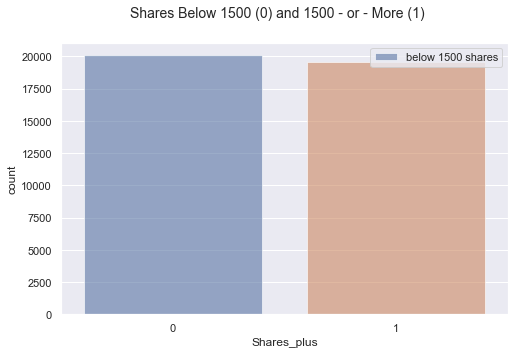

In [4]:
# styling the figure
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

# titling and labeling
plt.suptitle("Shares Below 1500 (0) and 1500 - or - More (1)", fontsize=14)
plt.ylabel("count")

#plotting
ax = sns.countplot(x="Shares_plus",alpha=.6, data=df_2);

# adding legend
plt.legend(labels=('below 1500 shares', '1500 and above'))
plt.show()

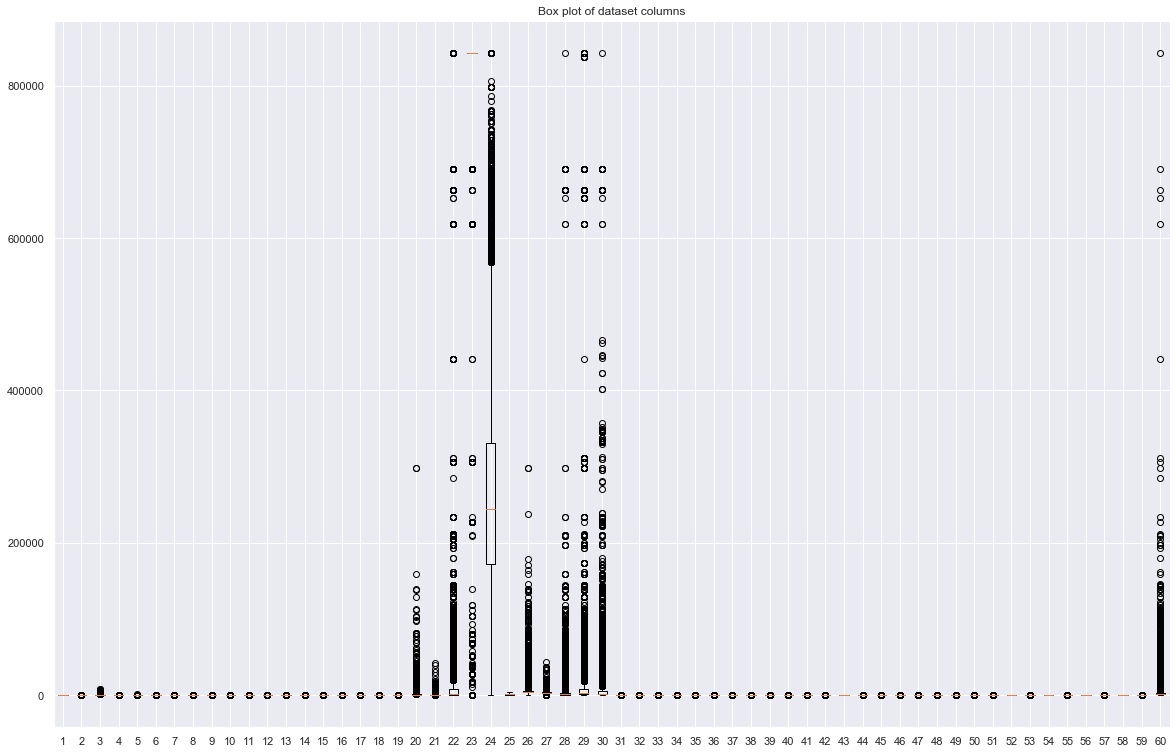

In [5]:
# Create a box plot of each column
plt.figure(figsize=(20, 13))
plt.boxplot([df_2[col] for col in df_2.iloc[:, 0:60].columns])

plt.title("Box plot of dataset columns")
#plt.xticks(range(len(df_2.columns.values)), df_2.columns.values)
plt.show()


> We see a significant range in scale for data in this set; however, scaling is not required for Decision Tree models, which is what we will be using to set a modeling baseline.

## Build a Base Model

We will start by building a simple decision tree.

#### Import Required Libraries

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

#### Split Outcome Variables and Target

In [7]:
# spliting the dataframe outcome and predictor variables
X = df_2.drop(['shares', 'Shares_plus'], axis=1) # features
y = df_2['Shares_plus'] # target

# splitting the dataset into 75/25 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 0
                                                   )

#### Buid a Decision Tree

In [8]:
# instantiate and fit a Decision Tree classifier
tree_clf = DecisionTreeClassifier(criterion='gini'
                                  , max_depth=5, 
                                    random_state = 0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Feature Importance

Determine which features impact most significantly the outcome, for our Decision Tree model.

In [9]:
# checking feature importances of the trained model
tree_clf.feature_importances_

array([0.06668088, 0.        , 0.        , 0.03397857, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00576391, 0.10550961, 0.        ,
       0.07508385, 0.09589684, 0.01117742, 0.        , 0.        ,
       0.00409296, 0.        , 0.        , 0.        , 0.        ,
       0.01493452, 0.3258526 , 0.11303927, 0.        , 0.00380801,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09888608, 0.00688671, 0.00954792,
       0.01868913, 0.        , 0.        , 0.        , 0.        ,
       0.00324808, 0.        , 0.00232904, 0.        , 0.00270122,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00189338])

#### Plot Feature Importances

Let's get a more useful view, by displaying feature importances with column names on a horizontal bar plot.

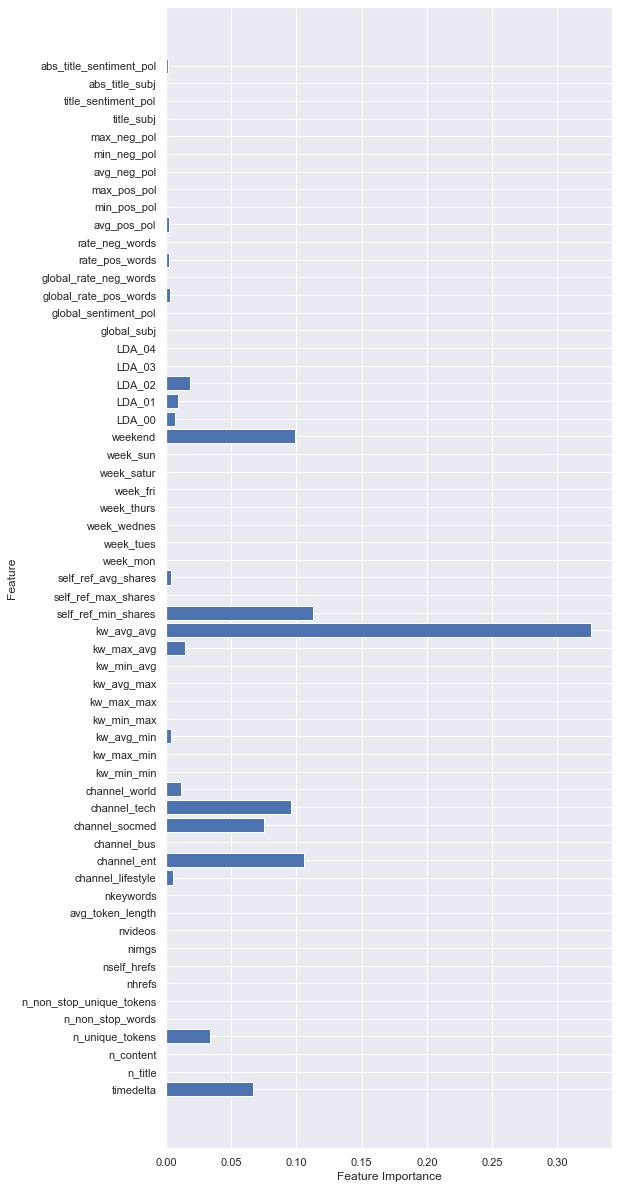

In [10]:
# visualize feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 21))
    plt.barh(range(n_features), 
             model.feature_importances_, 
             align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

> Most of the features do not seem to male a whole lot of difference.
* The plot suggests 7 - to - 10 at least moderately important features, among more than 50 in the dataset.

#### Model Performance

Along with an scikit-learn classification report, we will view a matrix and heatmap reflecting outcomes for our model, in the following format:

<table>
  <tr>
    <td>True Negative</td>
    <td>False Positive</td>
  </tr>
  <tr>
    <td>False Negative</td>
    <td>True Positive</td>
  </tr>
</table>

In [11]:
# viewing test set predictions
pred = tree_clf.predict(X_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))


 [[3237 1836]
 [1795 3043]] 

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      5073
           1       0.62      0.63      0.63      4838

    accuracy                           0.63      9911
   macro avg       0.63      0.63      0.63      9911
weighted avg       0.63      0.63      0.63      9911



In [ ]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(pred_labels == 1, true_labels == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(pred_labels == 0, true_labels == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(pred_labels == 1, true_labels == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(pred_labels == 0, true_labels == 1))
 
print 'TP: %i, FP: %i, TN: %i, FN: %i' % (TP,FP,TN,FN)

#### Display the Confusion Matrix

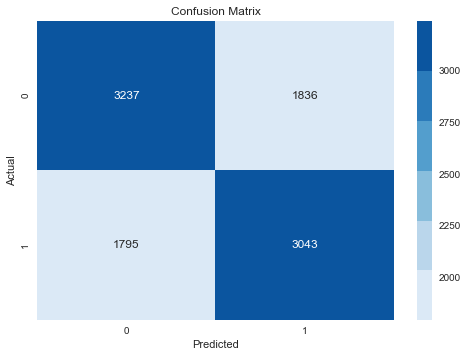

In [16]:
# plotting confusion matrix heatmap
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, cmap=sns.color_palette('Blues'), annot=True, fmt='0.4g')

plt.autoscale()

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

<table>
  <tr>
    <td>True Negative: </td>
    <td>False Positive: </td>
  </tr>
  <tr>
    <td>False Negative: </td>
    <td>True Positive: </td>
  </tr>
</table>

> Scores appear consistent accross the board, for this model, with precision, recall, and f1-scores all between 0.62 and 0.64, inclusive.

In [17]:
# displaying the model's test set accuracy
print("\nDecision Tree Classifier Testing Accuracy: {:.4}%\n".format(
    accuracy_score(y_test, pred) * 100))


Decision Tree Classifier Testing Accuracy: 63.36%



#### We can also plot ROC - AUC

In [18]:
from yellowbrick.classifier import roc_auc

C:\Users\jamel\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


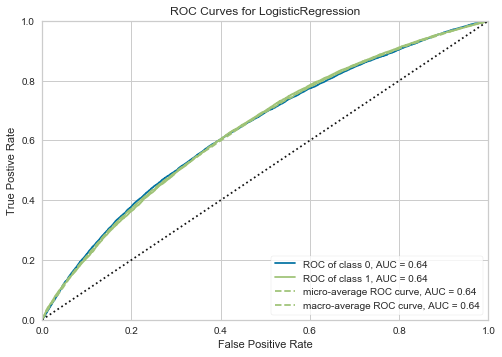

In [21]:
visualizer = roc_auc(LogisticRegression(), X, y)

> Near perfect predictions would display the curves elbow in the top - left corner of the plot. Our predictive capability is far from perfect, but it does give us an edge in our ability to determine, in advance, characteristics for an article to perform above the 50th - percentile for article shares (1400) and above our target (1500).

## Bootstrap Aggregation (Bagging)

> Next, we will try a bagged trees ensemble model. 
* This model can help reduce variance that may be present in a simple Decision Tree model.
* Considering the closely matched results of our original model's training and test sets, we are not likely to be surprised by the bagging scores.

In [22]:
# instantiating a Bagging classifier
bagged_tree_clf = BaggingClassifier(
    DecisionTreeClassifier(
        criterion='gini',
        max_depth=5,
        random_state=0
    ),
    n_estimators=20,
    random_state=0
)

In [23]:
# fit to the training data
bagged_tree_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
          

In [24]:
# checking the accuracy of our Training set
print("\nTraining set score: ", 
      bagged_tree_clf.score(X_train, 
                        y_train).round(2))

# checking the accuracy of our Test set
print("Test set score:     ", 
      bagged_tree_clf.score(X_test, 
                        y_test).round(2))


Training set score:  0.66
Test set score:      0.64


> True enough, our bagging scores are in line with scores from our original Tree model.
* Note: when tested with a max depth of 7, the model scores the training set at 0.69 and the test set at 0.65, indicating that the model quicky begins to overfit as we increase depth.

## Random Forest

> Our next ensemble model is Random Forest. 
* This model allows for lower correlation among samples, by limiting the number of features on which to split.
* We will see how its scores compares with our previous models.

In [25]:
# instantiating a Random Forest classifier
forest_clf = RandomForestClassifier(n_estimators=100, 
                                max_depth=5, 
                                random_state = 0)

# fit to training data
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
# checking the Training accuracy of our forest
print("\nTraining set score: ", forest_clf.score(X_train, y_train).round(2))

# checking the Test accuracy of our forest
print("Test set score:     ", forest_clf.score(X_test, y_test).round(2))


Training set score:  0.66
Test set score:      0.65


> Our test score nuged upwards, a tiny bit.
* So far, results have not strayed far from our our first - guess tree. 
* We can see if Random Forest indicates a change in feature importances, from our original Decision Tree model.

#### Forest Feature Importance

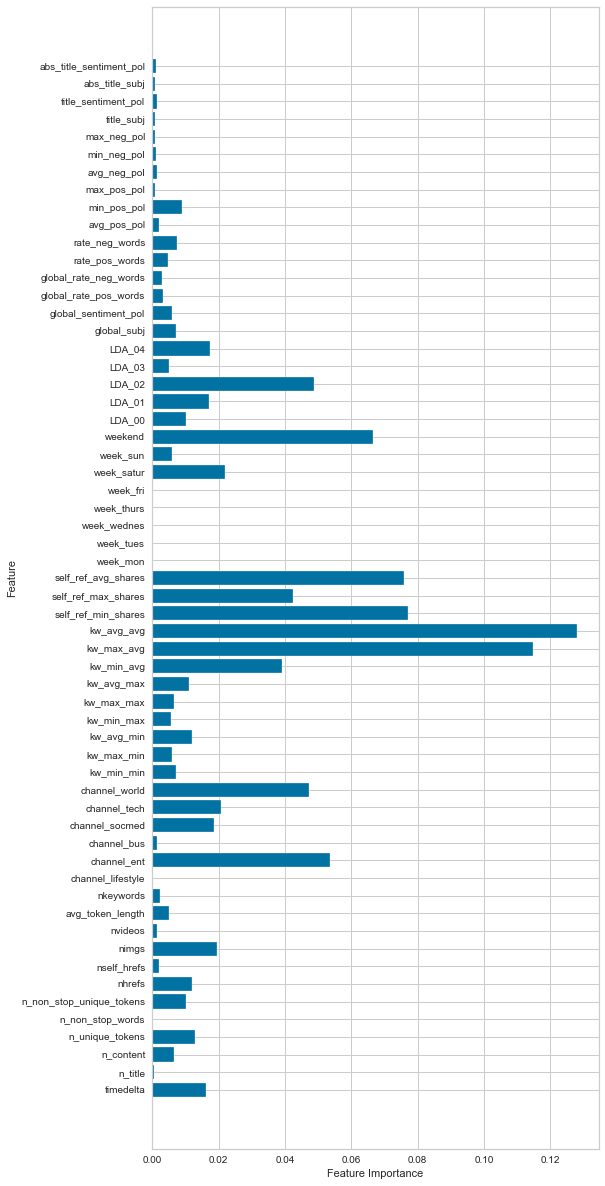

In [27]:
plot_feature_importances(forest_clf)

> While scores have remained close among our models, we can observe from the plot above that feature importances have shifted.
* The random forest classifier suggests about 10 relatively important features--a couple more than suggested by the Decision Tree model.
* Where `kw_avg_avg` reached 0.33 and `kw_avg_max` eeked - out only 0.02, in our Tree model, the Random Forest model improtances for the same two features are approximately 0.11 and 0.13, respectively.

Even if accuracy scores were exactly the same, the more balanced RandomForest model would be preferred to the lucky - guess of our original Decision Tree model.

> So far, we have been modeling with all features in the dataframe.
* Including irrelevant features can cause 'noise' in our model and make results less interpretable.
* We can make use of the `mlxtend` library's `SequentialFeatureSelector` module to perform forward selection and determine the best features to retain for modeling.

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [30]:
# Build step forward feature selection
sfs1 = sfs(forest_clf,
           n_jobs=5,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   34.9s
[Parallel(n_jobs=5)]: Done  59 out of  59 | elapsed:  1.2min finished

[2020-03-18 14:13:39] Features: 1/10 -- score: 0.5934488655961978[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   56.6s
[Parallel(n_jobs=5)]: Done  58 out of  58 | elapsed:  1.6min finished

[2020-03-18 14:15:17] Features: 2/10 -- score: 0.6138637301206918[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   48.2s
[Parallel(n_jobs=5)]: Done  57 out of  57 | elapsed:  1.4min finished

[2020-03-18 14:16:41] Features: 3/10 -- score: 0.6244913896695834[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done  56 out of  56 | elap

> So:
* The score for selected features only is comparable.
* We can use our selected featues to create a new `X` for training and testing.
* This will provide us with a much simpler set of relevant variables for modeling.

In [32]:
# Which features? Viewing column indexes of the selected predictors
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

# viewing `feat_cols` names, as a series
df_2.iloc[:, feat_cols].head(0).T

[0, 3, 13, 15, 16, 17, 22, 26, 29, 37]


url
timedelta
n_unique_tokens
channel_ent
channel_socmed
channel_tech
channel_world
kw_max_max
kw_avg_avg
self_ref_avg_shares
weekend


In [33]:
# creating a new set of train - test features
# our target `y` remains the same
X_feat = df_2.iloc[:, feat_cols]

X_feat.head(0)

,timedelta,n_unique_tokens,channel_ent,channel_socmed,channel_tech,channel_world,kw_max_max,kw_avg_avg,self_ref_avg_shares,weekend
url,,,,,,,,,,


In [34]:
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
# clf1 = bagged_tree_clf
# clf2 = forest_clf
# clf3 = SVC(random_state=0, probability=True)
# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Plotting Decision Regions
# gs = gridspec.GridSpec(2, 2)
# fig = plt.figure(figsize=(10, 8))

# for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
#                          ['Bag of Trees', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
#                          itertools.product([0, 1], repeat=2)):
#     clf.fit(X, y)
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X_feat.values, y.astype(np.integer).values, clf=clf, legend=2)
#     plt.title(lab)
# plt.show()

# =========================================

#### 10 - fold mean cross validation our Forest model

In [25]:
# importing necessary library
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

mean_forest_cv_score = np.mean(cross_val_score(forest_clf, 
                                               X_train, 
                                               y_train, 
                                               cv=10))
print(f"\nMean Cross Validation Score for Random Forest Classifier: {mean_forest_cv_score :.2%}\n")


Mean Cross Validation Score for Random Forest Classifier: 65.63%



## GridSearch

Rather than settling for a single set of parameters, we can create a parameter grid dictionary that enables us to test different values for each parameter.

In [26]:
# creating a parameter grid dictionary
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

We can perform a Grid Search to determine an optimal parameter combination from among the values in our grid dictionary.

In [27]:
# performing a grid search with Random Forest
rf_grid_search = GridSearchCV(forest_clf, 
                              rf_param_grid, 
                              cv=3)
rf_grid_search.fit(X_train, y_train)
print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 66.69%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}


> GridSearch determined that our model could achieve its most accurate score, by changing `max_depth` from 5 to 'None'.
    * Optimal criterion was changed from 'gini' to 'entropy', and `n_estimators` were kept at the original setting of 100.
    * The grid search increased `min_samples_leaf` from 1 to 6, and `min_samples_split` was found to be more effective at 5, rather than our original value of 1.

### Other Algorithms

In addition to the models we have tested, Boosting models (including __AdaBoost__, __Gradient Boost__, and __XGBoost__) offer additional tuning options.

## Save and Continue

We can create a pipeline that will enable us to plug - in various models. By creating a scaled pipeline we can also, easily incorporate and compare additional models such as __K-Nearest Neighbors__(KNN).

We will tackle that in the next notebook. First, we will use a set of custom functions to save the models we have created so far.

In [38]:
# importing custom helper functions
from helpers.helper import *

In [29]:
# def save_model(model, directory='./models'):
#     """
#     creates a file name by appending .pickle' to a model's variable name,
#     and saves the model as a pickle file in the working directory's
#     'model' subdirectory
#     """
#     # verify or create the save - path directory
#     if not os.path.exists(directory):
#         os.mkdir(directory)

#     # build the file name
#     filename = [tuple[0] for tuple in filter(
#         lambda x: model is x[1],
#         globals().items())
#              ][0]


#     # pickle the model with the created filename
#     with open(f'{directory}/{filename}.pickle', 'wb') as f:
#         # pickling the dataframe using the highest protocol available
#         pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
#     return print(f'Saved {filename} to {directory} as pickle file: {filename}\n', '-'*50)


# def save_models(models):
#     """
#     passes a list of model names and saves
#     the models as separate pickle files
#     """
#     for m in models:
#         saved_model = save_model(m)
#     return saved_model


In [40]:
# list models from the current notebook
notebook_models = [tree_clf, 
                  bagged_tree_clf,
                  forest_clf,
                  rf_grid_search]

In [31]:
from yellowbrick.classifier import ClassificationReport

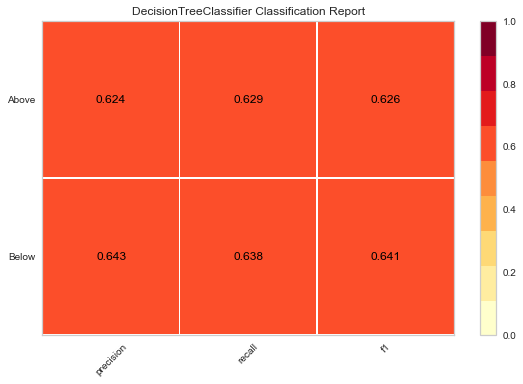

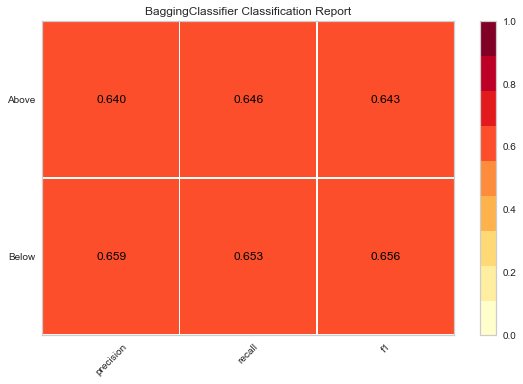

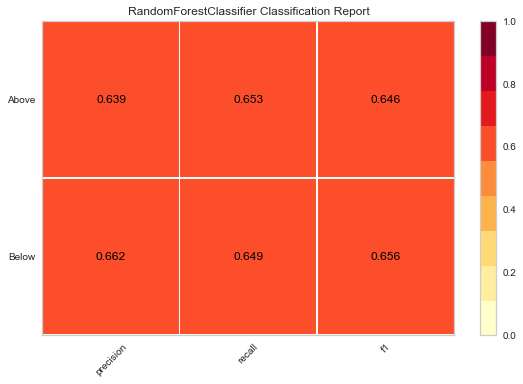

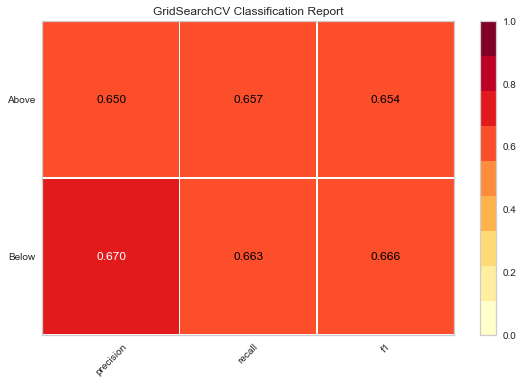

In [37]:
for mod in notebook_models:
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(mod, classes=['Below', 'Above'])
    visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
    visualizer.score(X_test, y_test) # Evaluate the model on the test data
    g = visualizer.poof() # Draw/show/poof the data

In [38]:
from yellowbrick.cluster import silhouette_visualizer

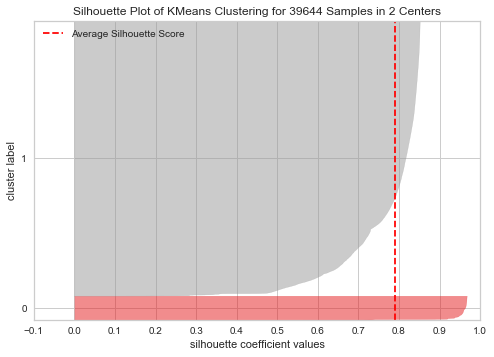

In [49]:
visualizer = silhouette_visualizer(KMeans(2, random_state=0), X)

In [44]:
# from yellowbrick.features import manifold_embedding

In [45]:
# visualizer = manifold_embedding(X, y)

### Serialize Models

In [175]:
m1_clf = "I'm a model, babe."
m2_clf = "I'm a model, too, babe."
m3_clf = "I'm a model, three, babe."

test_models = [m1_clf, m2_clf, m3_clf ]

def model_name(model):
    """
    returns a model variable as a string
    """
    return [tuple[0] for tuple in filter(
        lambda x: model is x[1],
        globals().items())
             ][0]

# showing a model
print( m1_clf )

# showing a variable name as a string
print( "-"*72, "\n", model_name(m1_clf), "\n", "-"*72 )

# showing the list
print( test_models )

# showing the variable name as a string
print( "-"*72, "\n", model_name(test_models) )

I'm a model, babe.
------------------------------------------------------------------------ 
 m1_clf 
 ------------------------------------------------------------------------
["I'm a model, babe.", "I'm a model, too, babe.", "I'm a model, three, babe."]
------------------------------------------------------------------------ 
 test_models


In [176]:
def save_model(model, directory='./mods'):
    """
    creates a file name by appending .pickle' to a model's variable name,
    and saves the model as a pickle file in the working directory's
    'model' subdirectory
    """
    # build the file name
    f_name = [tuple[0] for tuple in filter(
        lambda x: model is x[1],
        globals().items())
             ][0]

    # replace undersocres with dashes, before pickling
    f_name = f_name.replace('_', '-')
    
    # verify or create the save - path directory
    if not os.path.exists(directory):
        os.mkdir(directory)

    # pickle the model with the created filename
    with open(f'{directory}\/{f_name}.pickle', 'wb') as f:
        # pickling the dataframe using the highest protocol available
        pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
    return print(f'Saved to {directory} as pickle file: {f_name}\n', '-'*50)

# saving a single model to the `mods` folder
save_model(m1_clf)

Saved to ./mods as pickle file: m1-clf
 --------------------------------------------------


In [177]:
def save_models(models):
    """
    passes a list of model names and saves
    the models as separate pickle files
    """
    for m in models:
        saved_model = save_model(m)
    return saved_model

# using the `test_models` list to save all 
# models to the `mods` folder
save_models(test_models)

Saved to ./mods as pickle file: m1-clf
 --------------------------------------------------
Saved to ./mods as pickle file: m2-clf
 --------------------------------------------------
Saved to ./mods as pickle file: m3-clf
 --------------------------------------------------


In [182]:
# getting names of files in `mods' folder
# that have the .pickle extension
for name in glob.glob('mods/*.pickle'):
    print(os.path.basename(name))

m1-clf.pickle
m2-clf.pickle
m3-clf.pickle


### Un - serialize Model(s) from Pickle(s)

In [183]:
# opening saved data from pickle file(s) in `mods` folder
# The protocol version used is detected automatically, so we do not
# have to specify it.

f_name=None

def un_pickle_from_mods(files_list):
    path = 'mods/*.pickle'
    for tpl in glob.glob(path):
        if name[1] in files_list:
            print('name[1] is in the file list\n')
            f_name = os.path.splitext(
                os.path.basename(
                    name[1]
                )
            )[0
              ].replace('-', '_')  # replace dashes with undersocres
            print("f_name assigned \n")
            with open(name, 'rb') as f:
                f_name = pickle.load(f)
            print(f"{f_name} opened\n")
    return f_name


In [184]:
# opening saved data from pickle file(s) in `mods` folder
# The protocol version used is detected automatically, so we do not
# have to specify it.

f_name=None

def un_pickle_from_mods_2(files_path):
    for item in files_path:
        #path = './mods/*.pickle'
        for tpl in glob.glob('./mods/*.pickle'):
            if item in tpl:
                print(os.path.normpath(tpl))
                # printing filename with extension
                print(os.path.basename(tpl))
                # instantiating variable for filename without extension
                f_name = os.path.splitext(os.path.basename(tpl))[0]
                print(f'{f_name} is in the file list\n')
                # instantiate variable name, replacing dashes with undersocres
                f_name = f_name.replace('-', '_')
                print(f_name, "is in memory")
                print("-"*72, "\n")
                with open(os.path.relpath(tpl), 'rb') as f:
                    f_name = pickle.load(f)
                print(f"{f_name} opened\n")
    return f_name

In [186]:
print(glob.glob('mods/*.pickle'))

['mods\\m1-clf.pickle', 'mods\\m2-clf.pickle', 'mods\\m3-clf.pickle']


In [194]:
# ADD TO FUNCTION
for tpl in glob.glob('mods/*.pickle'):
    r_path = os.path.relpath(tpl)
    print(r_path)
    
    # instantiating variable for filename  with extension
    b_name = os.path.basename(tpl)
    print(b_name)
    
    # instantiating variable for filename without extension
    f_name = os.path.splitext(b_name)[0]
    print(f'{f_name} is in the file list\n')
    
    # instantiate variable name, replacing dashes with undersocres
    f_name = f_name.replace('-', '_')
    print(f_name, "is in memory")
    print("-"*72, "\n")
    
    with open(os.path.relpath(tpl), 'rb') as f:
        f_name = pickle.load(f)
        print(f"{f_name} opened\n")

mods\m1-clf.pickle
m1-clf.pickle
m1-clf is in the file list

m1_clf is in memory
------------------------------------------------------------------------ 

I'm a model, babe. opened

mods\m2-clf.pickle
m2-clf.pickle
m2-clf is in the file list

m2_clf is in memory
------------------------------------------------------------------------ 

I'm a model, too, babe. opened

mods\m3-clf.pickle
m3-clf.pickle
m3-clf is in the file list

m3_clf is in memory
------------------------------------------------------------------------ 

I'm a model, three, babe. opened



In [173]:
un_pickle_from_mods(['m3-clf.pickle'])

UnboundLocalError: local variable 'f_name' referenced before assignment

In [91]:
test_models

["I'm a model, babe.", "I'm a model, too, babe.", "I'm a model, three, babe."]

In [ ]:
*************
os.path.splitext(os.path.basename(tpl[1]))[0]
f_name = os.path.split(name)[1].replace('-', '_')

# File path example.
path = "/some/file.with spaces.dot.docx"

# Get the filename only from the initial file path.
filename = os.path.basename(path)

# Use splitext() to get filename and extension separately.
(file, ext) = os.path.splitext(filename)

In [ ]:
# pass model list to the custom `save_models` function
save_models(notebook_models)

### Save Data

In [ ]:
# 72 Char. screen - width reference
########################################################################

In [ ]:
with open('data/#.pickle', 'wb') as f:
    # pickling the dataframe using the highest protocol available
    pickle.dump(#, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
def pickle_model(model):
    
    with open('data/#.pickle', 'wb') as f:
        # pickling the dataframe using the highest protocol available
        pickle.dump(#, f, pickle.HIGHEST_PROTOCOL)